# Data Mining - HW1
### September 2022
### Name: Ozlem Melda Gunes
### UR ID: 32375619

### Import Libs

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
data_names = ['cleveland'] #  the Cleveland database is the only one that has been used by ML researchers to this date
attribute_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

data_list =[]
for dn in data_names:
    print(dn)
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.' + dn + '.data', 
                     names=attribute_names)
    print(df.shape)
    data_list.append(df) 
data = pd.concat(data_list)

cleveland
(303, 14)


### Overview of Data

In [3]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [4]:
data.shape

(303, 14)

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [7]:
data.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [8]:
data.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [9]:
# data[data['ca'] == "?"]
data["ca"] = np.where(data["ca"] == "?", np.NaN, data["ca"])

In [10]:
# data[data['thal'] == "?"]
data["thal"] = np.where(data["thal"] == "?", np.NaN, data["thal"])

### Data Cleaning

In [11]:
data.isnull().sum() # check null values if there is any

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [12]:
data.dropna(inplace = True) # Get rid of NA values for this task

In [15]:
data[data.duplicated()] # Check duplicated rows if there is any

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [16]:
data["thal"] = data["thal"].astype('float')
data["ca"] = data["ca"].astype('float')

#### Process data types, values and names

Binary
- sex: sex (1 = male; 0 = female)
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- exang: exercise induced angina (1 = yes; 0 = no)

Categorical
- cp: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
- restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- slope: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Ordinal
- ca: number of major vessels (0-3) colored by flourosopy

Numeric
- age: age in years
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- thalach: maximum heart rate achieved
- oldpeak = ST depression induced by exercise relative to rest

Target
- target: diagnosis of heart disease (angiographic disease status)
    -- Value 0 or > 0

In [17]:
bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = ['target']

In [18]:
# Get copy of original table for heat map and bar plot
data_backup = data.copy()

In [19]:
data.sex = data.sex.replace({0:'Female', 1:'Male'})
data.fbs = data.fbs.replace({0:'Low fbs', 1:'High fbs'})
data.exang = data.exang.replace({0:'No exer. ind. angina', 1:'Exer ind. angina'})
data.cp = data.cp.replace({1:'Typical', 2:'Atypical', 3:'Non', 4:'Asympt.'})
data.restecg = data.restecg.replace({0:'Normal', 1:'ST-T wave', 2:'LV hyper'})
data.slope = data.slope.replace({1:'up', 2:'flat', 3:'down'})
data.thal = data.thal.replace({np.NaN:'NA', 3.0:'Normal', 6.0:'Fixed', 7.0:'Revers.'})
data["target"] = np.where(data["target"] == 0, "No Disease", "Heart Disease")

In [20]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,Typical,145.0,233.0,High fbs,LV hyper,150.0,No exer. ind. angina,2.3,down,0.0,Fixed,No Disease
1,67.0,Male,Asympt.,160.0,286.0,Low fbs,LV hyper,108.0,Exer ind. angina,1.5,flat,3.0,Normal,Heart Disease
2,67.0,Male,Asympt.,120.0,229.0,Low fbs,LV hyper,129.0,Exer ind. angina,2.6,flat,2.0,Revers.,Heart Disease


### Exploratory Data Analysis

Before going into the detail of target-based analysis, let's observe the distribution of attributes

#### Attribute Value Distribution

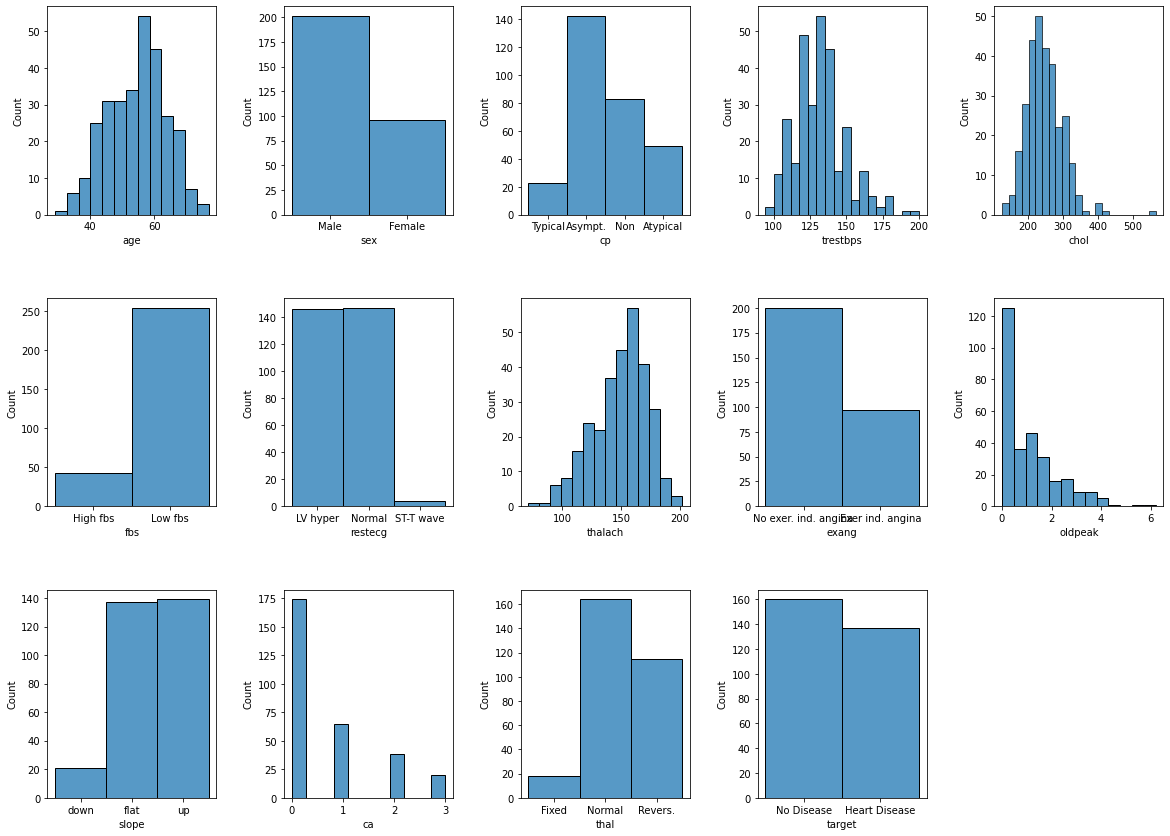

In [21]:
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4, bottom=0.01, top=0.95)

for i, var in enumerate(attribute_names):
    i = i + 1
    ax = fig.add_subplot(4, 5, i)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    sns.histplot(data = data, x = var, ax = ax)

plt.show()

- Normally distributed age
- More male than female
- target is almost split equally

#### Attribute Distributions according to Target Value

##### Numerical and Ordinal Attribute Analysis

In [22]:
data.groupby("target")[nums + ords].mean()

,age,trestbps,chol,thalach,oldpeak,ca
target,,,,,,
Heart Disease,56.759124,134.635036,251.854015,139.109489,1.589051,1.145985
No Disease,52.643750,129.175000,243.493750,158.581250,0.598750,0.275000


In [23]:
data.groupby("target")[nums + ords].std()

,age,trestbps,chol,thalach,oldpeak,ca
target,,,,,,
Heart Disease,7.899670,18.89673,49.679937,22.710673,1.305006,1.018506
No Disease,9.551151,16.37399,53.757550,19.043304,0.787160,0.633945


Individuals are more like to have a heart disease with the conditions of:
- Older (age)
- Higher resting blood pressure (trestbps)
- Higher cholesterol (chol)
- Lower maximum heart rate (thelach)
- Higher exercise-induced ST depression (oldpeak)
- More vessels colored by fluoroscopy (ca)

#### Let's look at each numeric attribute effect on target group using box-plots

C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


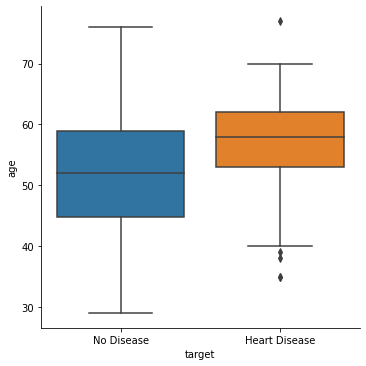

In [24]:
# Age
sns.factorplot("target", y="age", data=data, kind="box")

 Older ages more likely to have heart diseases compared to younger ages. For the individuals with heart disease, medium age, 25%-75% quantile is higher.

C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


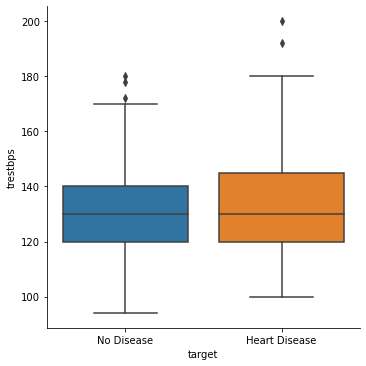

In [25]:
# Resting blood pressure
sns.factorplot("target", y="trestbps", data=data, kind="box")

Median is almost same, but maximum value of Higher resting blood pressure is higher for the ones with heart disease.

C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


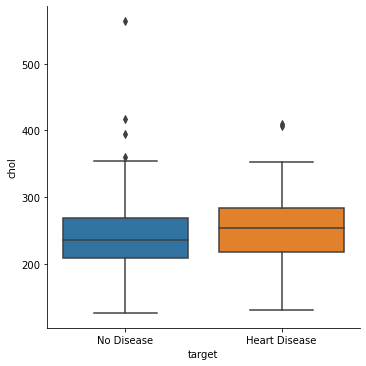

In [24]:
# Cholesterol
sns.factorplot("target", y="chol", data=data, kind="box")

Individual with higher chol are more likely to have heart diseases. For the ones with heart disease, medium chol, 25%-75% quantile is higher.

C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


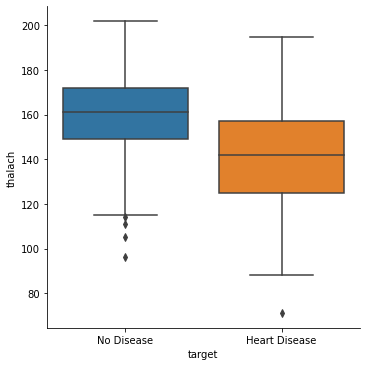

In [26]:
# Lower maximum heart rate
sns.factorplot("target", y="thalach", data=data, kind="box")

Lower maximum heart rate is likely to be higher for individuals with no heart disease. For the ones with heart disease, medium thalach, 25%-75% quantile is lower.

C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


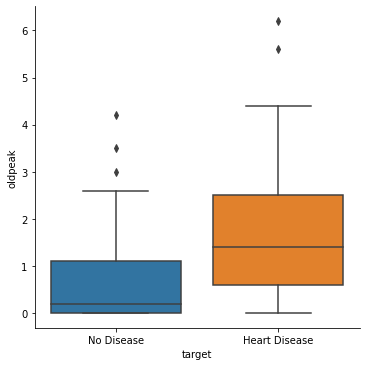

In [28]:
# Higher exercise-induced ST depression
sns.factorplot("target", y="oldpeak", data=data, kind="box")

Individual with higher exercise-induced ST depression are more likely to have heart diseases. For the ones with heart disease, medium oldpeak, 25%-75% quantile is higher.

##### Categorical Attribute Analysis

C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
C:\Users\ozlem.gunes\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


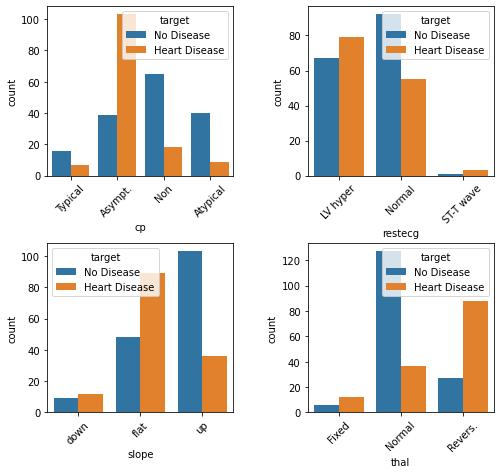

In [29]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4, bottom=0.01, top=0.95)

for i, var in enumerate(cats):
    i = i + 1
    ax = fig.add_subplot(2, 2, i)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    sns.countplot(data = data, x = var, hue = 'target', ax = ax)

plt.show()

As can be seen from the histograms, individuals are :
- More like to have heart disease with asymptomatic angina (cp)
- Less likely to have heart disease with atypical or no angina (cp)
- Less likely to have heart disease with normal resting ECG (restecg)
- More likely to have heart disease with a reversible defect (thal)
- Less likely to have heart disease with a normal result on the thalium test (thal)
- As to slope,
    - It seems that individuals are more likely to have a heart disease with a flat peak exercise ST segment. However, it seems weird. I checked the source data and could not find any mistake that I made. I read "Exercise ECGs with up-sloping ST-segment depressions are typically reported as an ‘equivocal’ test" on a blog (https://towardsdatascience.com/heart-disease-prediction-73468d630cfc). So, we can not build a correlation between our target and up-slope. I assume this is the case. 
    - I also checked blogs studied this data. They got this data not directly from UCI repo but from other repos. Therefore, our source data are different. Therefore, it would not be right to compare their studies with mine.

#### Let's look at the correlation between our attributes and target variable as a whole picture
We can use a heat map and barplot

<AxesSubplot:>

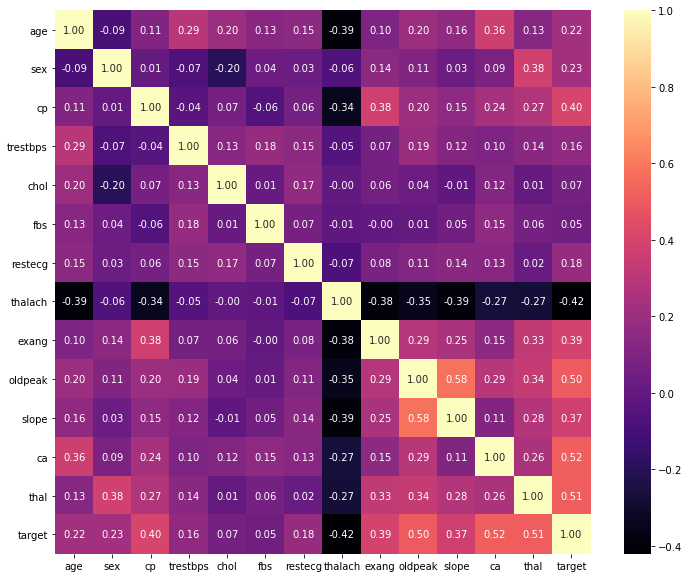

In [30]:
plt.figure(figsize=(12,10))
data_corr=data_backup.corr()
sns.heatmap(data_corr,annot=True,cmap="magma",fmt='.2f')

As can be seen from the heatmap; 
- Following attributes are highly correlated with target:
    - cp (chest pain type),
    - thalac (maximum heart rate achieved),
    - exang (exercise induced angina),
    - oldpeak (higher exercise-induced ST depression),
    - slope (peak exercise ST segment),
    - ca (more vessels colored by fluoroscopy),
    - thal (displays the thalassemia)
- Following attributes are highly correlated with each other:
    - age / thalac (maximum heart rate achieved)
    - oldpeak (higher exercise-induced ST depression) / slope (peak exercise ST segment)

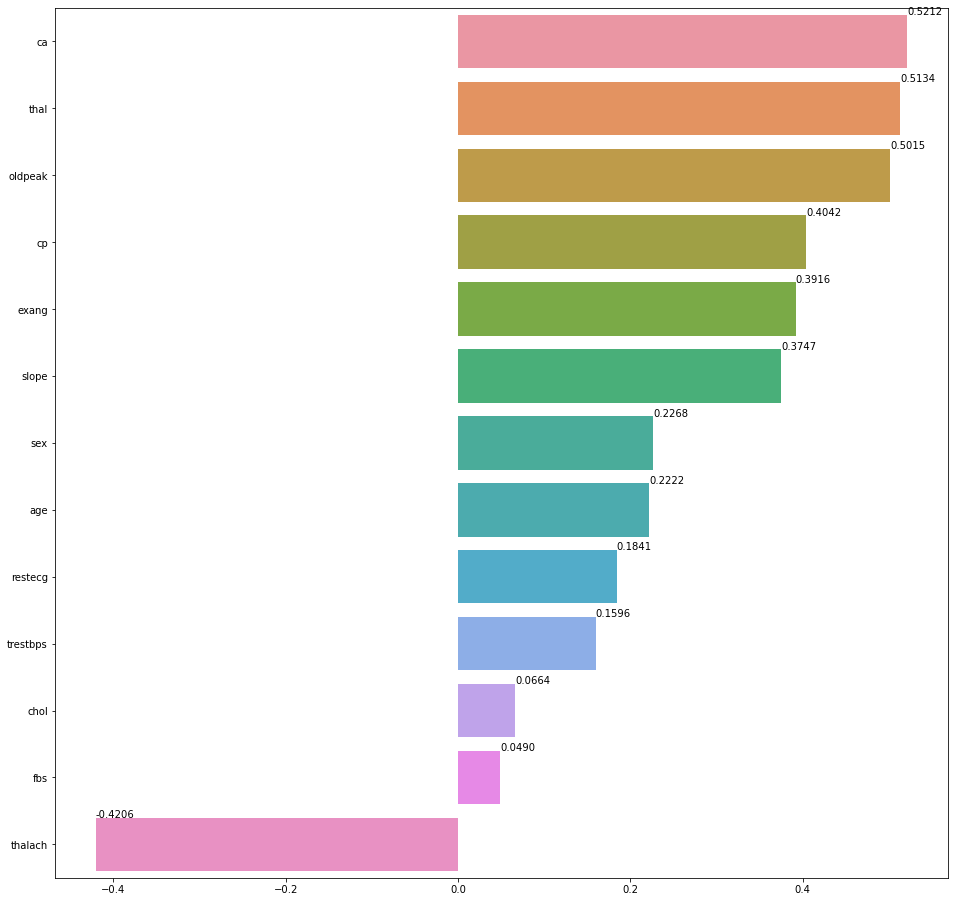

In [31]:
corr = data_corr['target'].sort_values(ascending=False)
corr = corr.drop(['target'])
corr.to_frame()

plt.figure(figsize=(16,16))
ax = sns.barplot(y=corr.index,x=corr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

As can be seen from the barplot; We order the attributes according to their correlations to target. This graph is more readable to understand the relation between attributes and one variable (target) compared to heatmap.